In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Basic Checks

In [2]:
# Load the data into a table

heartDataset = pd.read_csv("heart.csv")
print("First 5 rows")
print(tabulate(heartDataset.head().values.tolist(),
               headers=heartDataset.columns, tablefmt="simple_outline"))
print("\nShape (rows, columns):", heartDataset.shape)

First 5 rows
┌───────┬───────┬─────────────────┬─────────────┬───────────────┬─────────────┬──────────────┬─────────┬──────────────────┬───────────┬────────────┬────────────────┐
│   Age │ Sex   │ ChestPainType   │   RestingBP │   Cholesterol │   FastingBS │ RestingECG   │   MaxHR │ ExerciseAngina   │   Oldpeak │ ST_Slope   │   HeartDisease │
├───────┼───────┼─────────────────┼─────────────┼───────────────┼─────────────┼──────────────┼─────────┼──────────────────┼───────────┼────────────┼────────────────┤
│    40 │ M     │ ATA             │         140 │           289 │           0 │ Normal       │     172 │ N                │       0   │ Up         │              0 │
│    49 │ F     │ NAP             │         160 │           180 │           0 │ Normal       │     156 │ N                │       1   │ Flat       │              1 │
│    37 │ M     │ ATA             │         130 │           283 │           0 │ ST           │      98 │ N                │       0   │ Up         │         

In [3]:
# Check for missing values in the table

print("Missing Values per Column")
missingValuesTable = pd.DataFrame({
    "Column": heartDataset.columns,
    "MissingCount": [heartDataset[c].isna().sum() for c in heartDataset.columns]
})
print(tabulate(missingValuesTable.values.tolist(),
               headers=missingValuesTable.columns, tablefmt="simple_outline"))

Missing Values per Column
┌────────────────┬────────────────┐
│ Column         │   MissingCount │
├────────────────┼────────────────┤
│ Age            │              0 │
│ Sex            │              0 │
│ ChestPainType  │              0 │
│ RestingBP      │              0 │
│ Cholesterol    │              0 │
│ FastingBS      │              0 │
│ RestingECG     │              0 │
│ MaxHR          │              0 │
│ ExerciseAngina │              0 │
│ Oldpeak        │              0 │
│ ST_Slope       │              0 │
│ HeartDisease   │              0 │
└────────────────┴────────────────┘


In [4]:
# Column Datatypes 
print("Data Types and Column Info")
dataTypesTable = pd.DataFrame({
    "Column": heartDataset.columns,
    "Dtype": heartDataset.dtypes.astype(str),
    "UniqueValues": [heartDataset[c].nunique(dropna=True) for c in heartDataset.columns]
})
print(tabulate(dataTypesTable.values.tolist(),
               headers=dataTypesTable.columns, tablefmt="simple_outline"))


Data Types and Column Info
┌────────────────┬─────────┬────────────────┐
│ Column         │ Dtype   │   UniqueValues │
├────────────────┼─────────┼────────────────┤
│ Age            │ int64   │             50 │
│ Sex            │ object  │              2 │
│ ChestPainType  │ object  │              4 │
│ RestingBP      │ int64   │             67 │
│ Cholesterol    │ int64   │            222 │
│ FastingBS      │ int64   │              2 │
│ RestingECG     │ object  │              3 │
│ MaxHR          │ int64   │            119 │
│ ExerciseAngina │ object  │              2 │
│ Oldpeak        │ float64 │             53 │
│ ST_Slope       │ object  │              3 │
│ HeartDisease   │ int64   │              2 │
└────────────────┴─────────┴────────────────┘


In [5]:
# Separate numerical vs categorical columns

numericColumnsRaw = heartDataset.select_dtypes(include=["number"]).columns.tolist()
categoricalColumnsRaw = heartDataset.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Treat likely binary numeric as categorical but  not changing the dataset)
likelyBinaryColumns = [
    col for col in numericColumnsRaw
    if heartDataset[col].dropna().isin([0, 1]).all() and col != "HeartDisease"
]

numericColumns = [col for col in numericColumnsRaw if col not in likelyBinaryColumns]
categoricalColumns = sorted(list(set(categoricalColumnsRaw + likelyBinaryColumns)))

featureSplitTable = pd.DataFrame({
    "NumericFeatures": pd.Series(numericColumns),
    "CategoricalFeatures": pd.Series(categoricalColumns)
}).fillna("")
print("Feature Split")
print(tabulate(featureSplitTable.values.tolist(),
               headers=featureSplitTable.columns, tablefmt="simple_outline"))

Feature Split
┌───────────────────┬───────────────────────┐
│ NumericFeatures   │ CategoricalFeatures   │
├───────────────────┼───────────────────────┤
│ Age               │ ChestPainType         │
│ RestingBP         │ ExerciseAngina        │
│ Cholesterol       │ FastingBS             │
│ MaxHR             │ RestingECG            │
│ Oldpeak           │ ST_Slope              │
│ HeartDisease      │ Sex                   │
└───────────────────┴───────────────────────┘


In [6]:
# Basic summary of numeric columns

print("Statistics of numeric columns")
numericSummaryTable = (
    heartDataset[numericColumnsRaw]
    .describe()
    .T
    .reset_index()
    .rename(columns={"index": "Column"})
)
print(tabulate(numericSummaryTable.values.tolist(),
               headers=numericSummaryTable.columns, tablefmt="simple_outline"))

Statistics of numeric columns
┌──────────────┬─────────┬────────────┬────────────┬───────┬────────┬───────┬───────┬───────┐
│ Column       │   count │       mean │        std │   min │    25% │   50% │   75% │   max │
├──────────────┼─────────┼────────────┼────────────┼───────┼────────┼───────┼───────┼───────┤
│ Age          │     918 │  53.5109   │   9.43262  │  28   │  47    │  54   │  60   │  77   │
│ RestingBP    │     918 │ 132.397    │  18.5142   │   0   │ 120    │ 130   │ 140   │ 200   │
│ Cholesterol  │     918 │ 198.8      │ 109.384    │   0   │ 173.25 │ 223   │ 267   │ 603   │
│ FastingBS    │     918 │   0.233115 │   0.423046 │   0   │   0    │   0   │   0   │   1   │
│ MaxHR        │     918 │ 136.809    │  25.4603   │  60   │ 120    │ 138   │ 156   │ 202   │
│ Oldpeak      │     918 │   0.887364 │   1.06657  │  -2.6 │   0    │   0.6 │   1.5 │   6.2 │
│ HeartDisease │     918 │   0.553377 │   0.497414 │   0   │   0    │   1   │   1   │   1   │
└──────────────┴─────────┴────

In [7]:
# Information of categorical columns

print("Information of Categorical Columns")
for col in categoricalColumns:
    print(f"\nColumn: {col}")
    uniqueLevelsTable = (
        heartDataset[col]
        .value_counts(dropna=False)
        .rename_axis(col)
        .reset_index(name="Count")
    )
    print(tabulate(uniqueLevelsTable.values.tolist(),
                   headers=uniqueLevelsTable.columns, tablefmt="simple_outline"))


Information of Categorical Columns

Column: ChestPainType
┌─────────────────┬─────────┐
│ ChestPainType   │   Count │
├─────────────────┼─────────┤
│ ASY             │     496 │
│ NAP             │     203 │
│ ATA             │     173 │
│ TA              │      46 │
└─────────────────┴─────────┘

Column: ExerciseAngina
┌──────────────────┬─────────┐
│ ExerciseAngina   │   Count │
├──────────────────┼─────────┤
│ N                │     547 │
│ Y                │     371 │
└──────────────────┴─────────┘

Column: FastingBS
┌─────────────┬─────────┐
│   FastingBS │   Count │
├─────────────┼─────────┤
│           0 │     704 │
│           1 │     214 │
└─────────────┴─────────┘

Column: RestingECG
┌──────────────┬─────────┐
│ RestingECG   │   Count │
├──────────────┼─────────┤
│ Normal       │     552 │
│ LVH          │     188 │
│ ST           │     178 │
└──────────────┴─────────┘

Column: ST_Slope
┌────────────┬─────────┐
│ ST_Slope   │   Count │
├────────────┼─────────┤
│ Flat       │ 

In [8]:
#  Quick peek of data quality

print(" Data Quality Checks ")
qualityCheckRows = []
for col in heartDataset.columns:
    columnSeries = heartDataset[col]
    if pd.api.types.is_numeric_dtype(columnSeries):
        qualityCheckRows.append([
            col, "numeric", columnSeries.min(), columnSeries.max(),
            int((columnSeries < 0).sum()), int((columnSeries == 0).sum()), ""
        ])
    else:
        qualityCheckRows.append([
            col, "categorical", "—", "—",
            "—", "—", f"{columnSeries.nunique(dropna=True)} unique"
        ])

qualityCheckTable = pd.DataFrame(qualityCheckRows, columns=[
    "Column", "Type", "Min", "Max", "Negatives", "Zeros", "Notes"
])
print(tabulate(qualityCheckTable.values.tolist(),
               headers=qualityCheckTable.columns, tablefmt="simple_outline"))

 Data Quality Checks 
┌────────────────┬─────────────┬───────┬───────┬─────────────┬─────────┬──────────┐
│ Column         │ Type        │ Min   │ Max   │ Negatives   │ Zeros   │ Notes    │
├────────────────┼─────────────┼───────┼───────┼─────────────┼─────────┼──────────┤
│ Age            │ numeric     │ 28    │ 77    │ 0           │ 0       │          │
│ Sex            │ categorical │ —     │ —     │ —           │ —       │ 2 unique │
│ ChestPainType  │ categorical │ —     │ —     │ —           │ —       │ 4 unique │
│ RestingBP      │ numeric     │ 0     │ 200   │ 0           │ 1       │          │
│ Cholesterol    │ numeric     │ 0     │ 603   │ 0           │ 172     │          │
│ FastingBS      │ numeric     │ 0     │ 1     │ 0           │ 704     │          │
│ RestingECG     │ categorical │ —     │ —     │ —           │ —       │ 3 unique │
│ MaxHR          │ numeric     │ 60    │ 202   │ 0           │ 0       │          │
│ ExerciseAngina │ categorical │ —     │ —     │ —    

# Target Variable Distribution 

 Target Distribution (0 = Normal, 1 = Disease) 
┌────────────────┬─────────┬───────────┐
│   HeartDisease │   Count │   Percent │
├────────────────┼─────────┼───────────┤
│              1 │     508 │     55.34 │
│              0 │     410 │     44.66 │
└────────────────┴─────────┴───────────┘


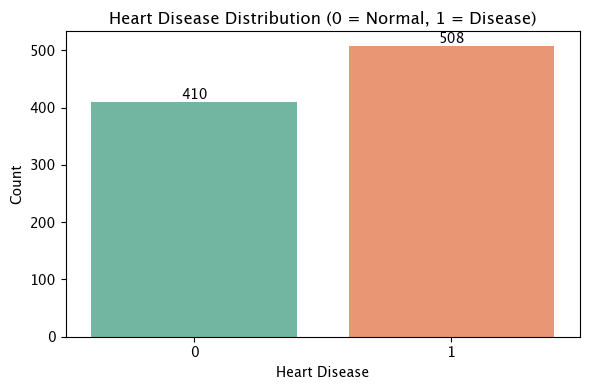

In [9]:
targetColumn = "HeartDisease"
targetCounts = (
    heartDataset[targetColumn]
    .value_counts(dropna=False)
    .rename_axis(targetColumn)
    .reset_index(name="Count")
)
targetCounts["Percent"] = (targetCounts["Count"] / targetCounts["Count"].sum() * 100).round(2)

print(" Target Distribution (0 = Normal, 1 = Disease) ")
print(tabulate(targetCounts.values.tolist(),
               headers=targetCounts.columns.tolist(),
               tablefmt="simple_outline"))

# 2) Bar plot 
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=heartDataset, x=targetColumn, hue=targetColumn,
                   palette="Set2", legend=False)
ax.set_title("Heart Disease Distribution (0 = Normal, 1 = Disease)")
ax.set_xlabel("Heart Disease")
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fmt="%d")

plt.tight_layout()
plt.show()

# Impute zeros in RestingBP and Cholesterol using grouped medians

In [10]:
# Identify invalid zeros
rbpZeroMask  = (heartDataset["RestingBP"] == 0)
cholZeroMask = (heartDataset["Cholesterol"] == 0)
print(f"Found zeros in RestingBP: {int(rbpZeroMask.sum())}, Cholesterol: {int(cholZeroMask.sum())}")

# Groups for  imputation
heartImputedDataset = heartDataset.copy()
heartImputedDataset["AgeBin"] = pd.cut(
    heartImputedDataset["Age"],
    bins=[0, 40, 50, 60, 70, 120],
    labels=["<=40", "41-50", "51-60", "61-70", ">70"],
    include_lowest=True
)

# Temporary copy where zeros are present
tmpFrame = heartImputedDataset.copy()
tmpFrame.loc[rbpZeroMask,  "RestingBP"]   = np.nan
tmpFrame.loc[cholZeroMask, "Cholesterol"] = np.nan

# Hierarchy of groups
groupOrder = [
    ["Sex", "ChestPainType", "AgeBin"],
    ["Sex", "AgeBin"],
    ["Sex"],
]

def hierarchicalFill(columnName: str, toInt: bool = True) -> pd.Series:
    
    filled = tmpFrame[columnName].copy()
    for keys in groupOrder:
        med = tmpFrame.groupby(keys, observed=True)[columnName].transform("median")
        filled = filled.fillna(med)
    filled = filled.fillna(tmpFrame[columnName].median())
    if toInt:
        filled = filled.round().astype("int64")
    return filled

# Perform imputation ONLY at zero positions
heartImputedDataset["RestingBP"]   = heartImputedDataset["RestingBP"].astype("float64")
heartImputedDataset["Cholesterol"] = heartImputedDataset["Cholesterol"].astype("float64")

heartImputedDataset.loc[rbpZeroMask,  "RestingBP"]   = hierarchicalFill("RestingBP", toInt=True).loc[rbpZeroMask]
heartImputedDataset.loc[cholZeroMask, "Cholesterol"] = hierarchicalFill("Cholesterol", toInt=True).loc[cholZeroMask]

heartImputedDataset["RestingBP"]   = heartImputedDataset["RestingBP"].round().astype("int64")
heartImputedDataset["Cholesterol"] = heartImputedDataset["Cholesterol"].round().astype("int64")

# Remove helper column
heartImputedDataset.drop(columns=["AgeBin"], inplace=True)

# Save new CSV
outputPath = "heart_imputed.csv"  # change if you want a different filename
heartImputedDataset.to_csv(outputPath, index=False)

# Quick verification 
print(
    "Remaining zeros in RestingBP:",
    int((heartImputedDataset["RestingBP"] == 0).sum()),
    ", Cholesterol:",
    int((heartImputedDataset["Cholesterol"] == 0).sum())
)

Found zeros in RestingBP: 1, Cholesterol: 172
Remaining zeros in RestingBP: 0 , Cholesterol: 0


# Univariate Analysis 


--- Age ---


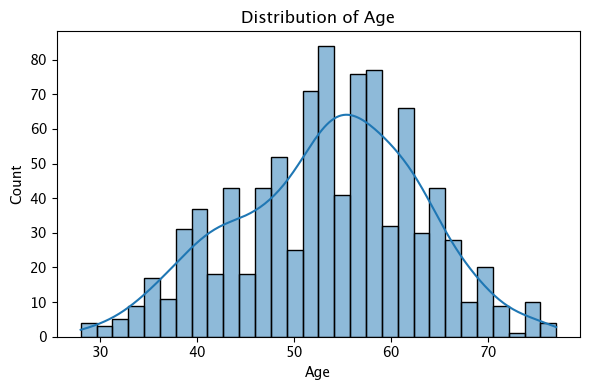

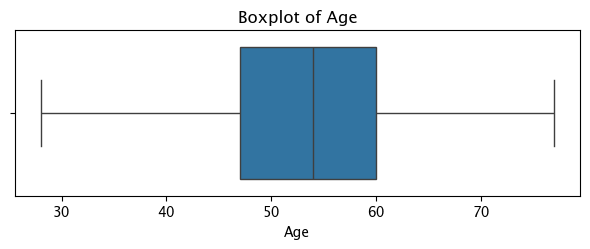


--- RestingBP ---


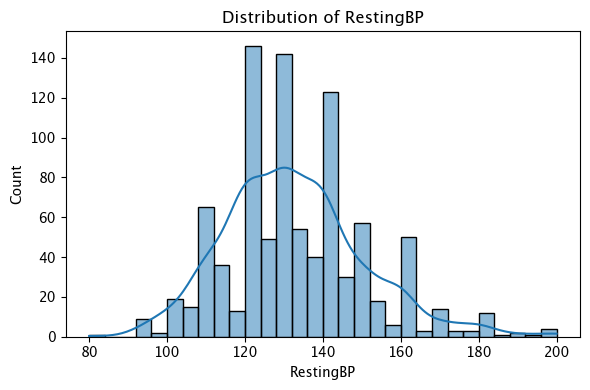

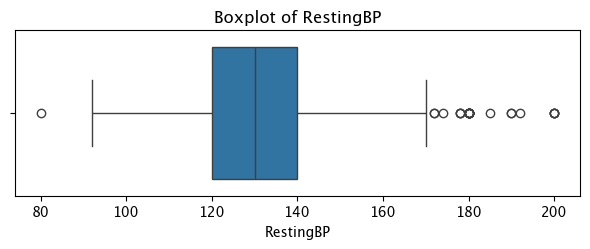


--- Cholesterol ---


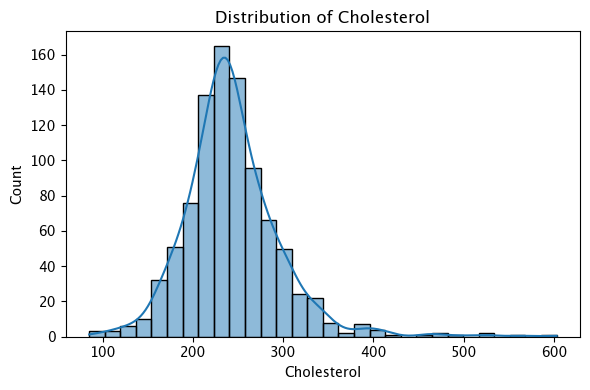

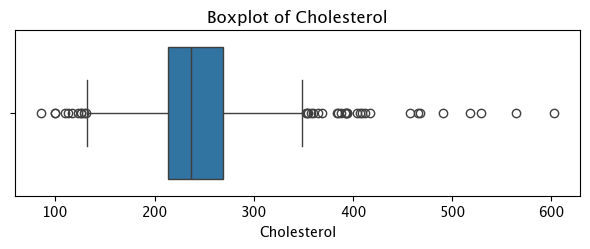


--- MaxHR ---


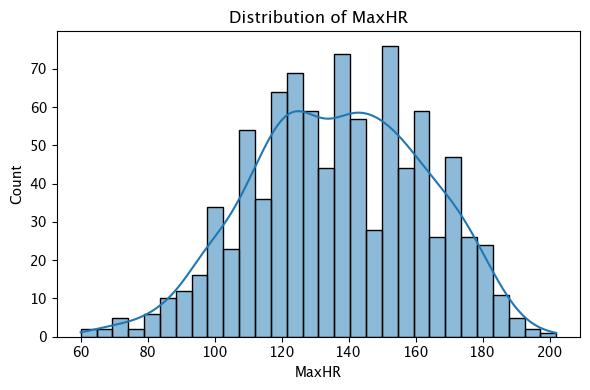

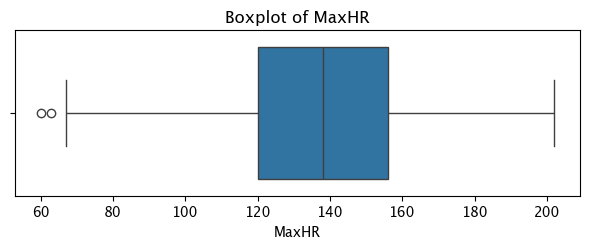


--- Oldpeak ---


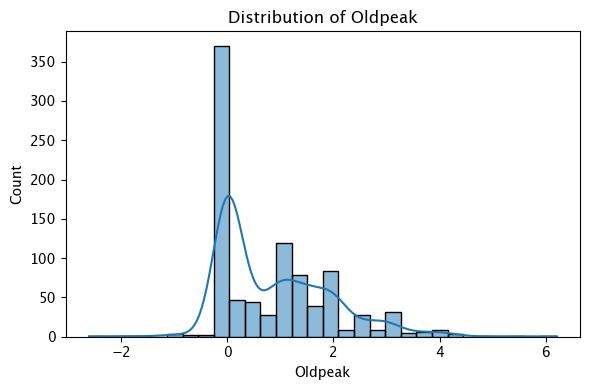

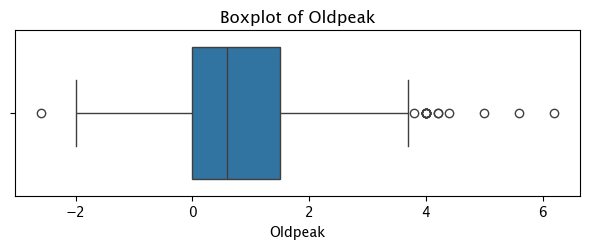

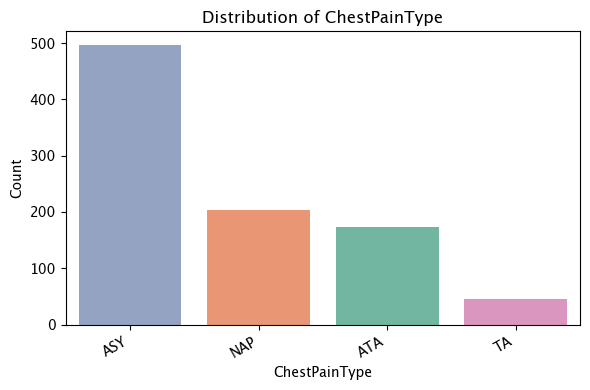

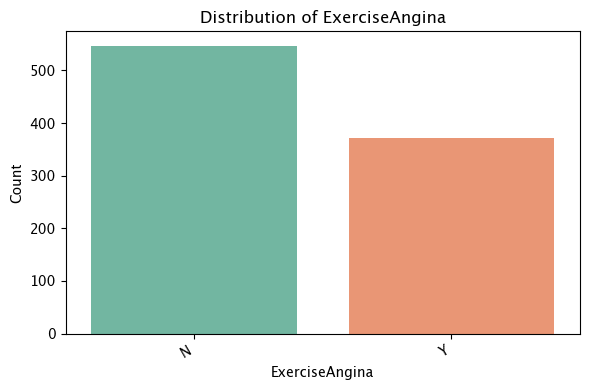

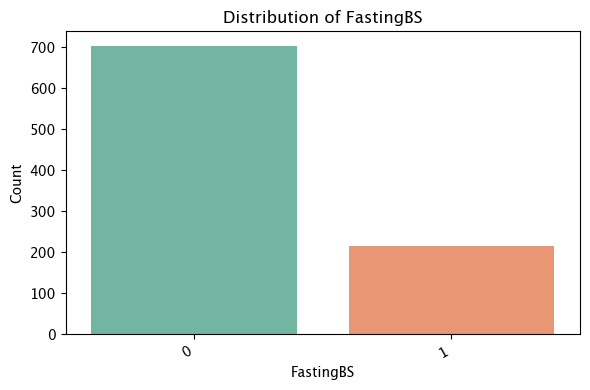

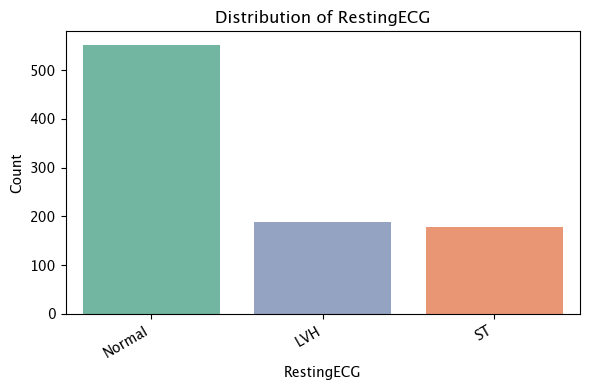

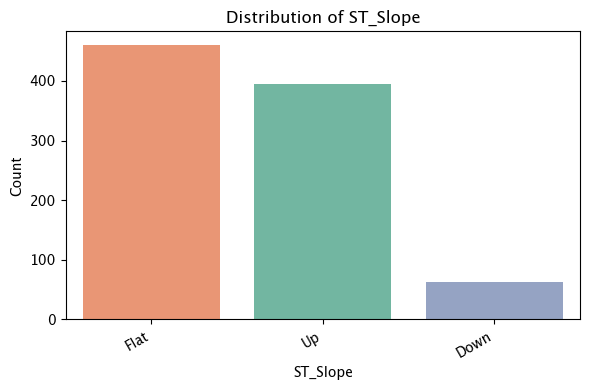

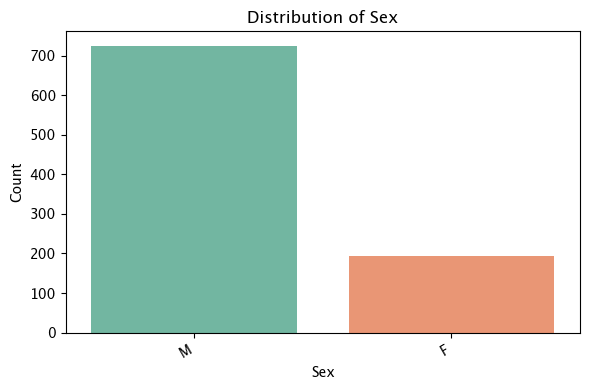

In [11]:
# Load the imputed dataset
heartImputedDataset = pd.read_csv("heart_imputed.csv") 

# Identify columns
numericColumnsRaw = heartImputedDataset.select_dtypes(include=["number"]).columns.tolist()
categoricalColumnsRaw = heartImputedDataset.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

likelyBinaryColumns = [
    col for col in numericColumnsRaw
    if heartImputedDataset[col].dropna().isin([0, 1]).all() and col != "HeartDisease"
]

numericColumns = [col for col in numericColumnsRaw if col not in likelyBinaryColumns and col != "HeartDisease"]
categoricalColumns = sorted(list(set(categoricalColumnsRaw + likelyBinaryColumns)))

# Numerical Features

for col in numericColumns:
    print(f"\n--- {col} ---")

    # Histogram + KDE
    plt.figure(figsize=(6, 4))
    sns.histplot(heartImputedDataset[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 2.6))
    sns.boxplot(x=heartImputedDataset[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# Categorical Features

for col in categoricalColumns:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        data=heartImputedDataset,
        x=col,
        hue=col,         
        legend=False,
        order=heartImputedDataset[col].value_counts().index,
        palette="Set2"
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# Bivariate Analysis (Feature vs Target)

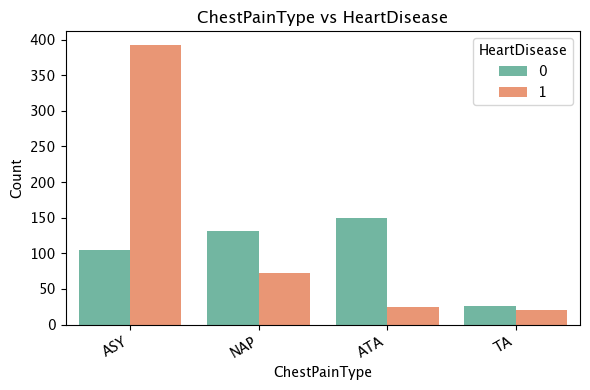

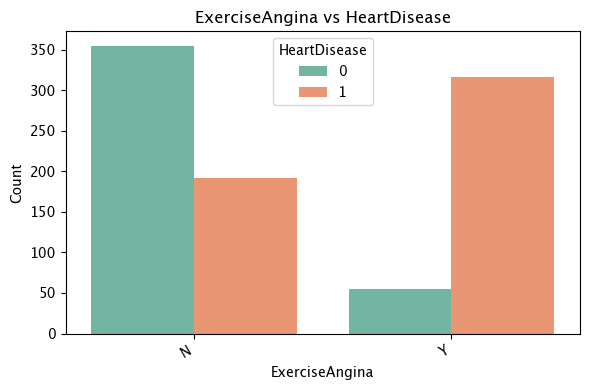

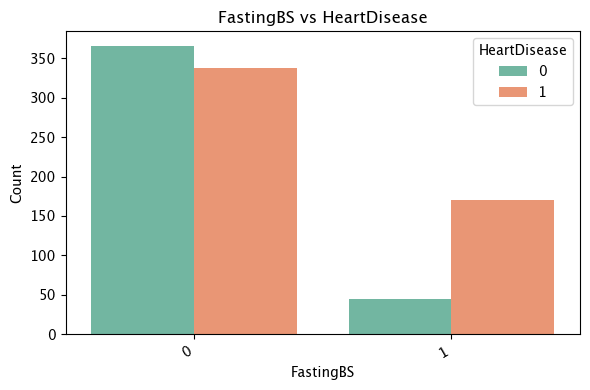

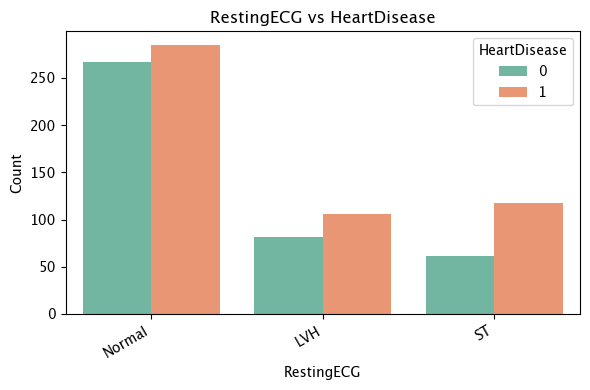

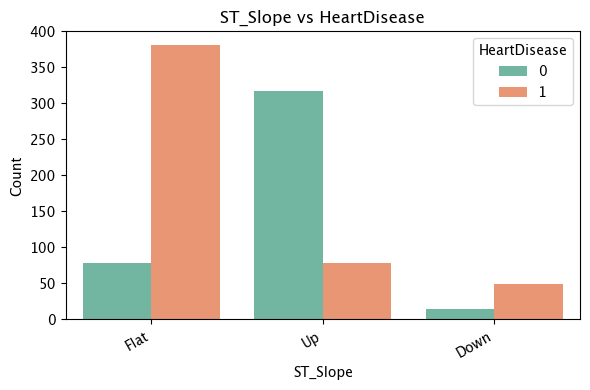

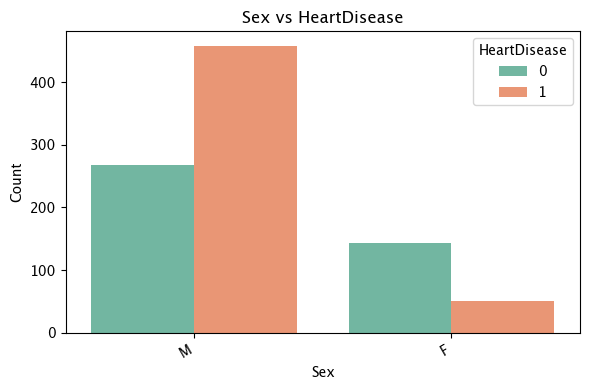

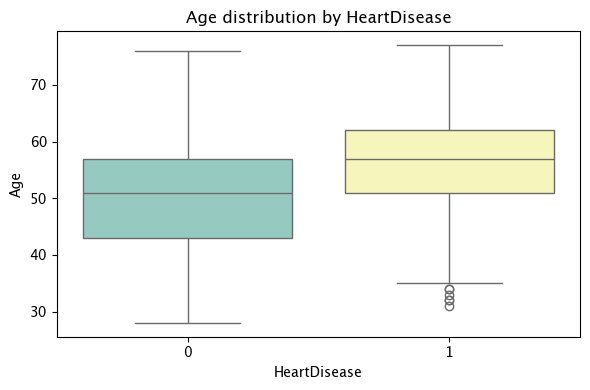

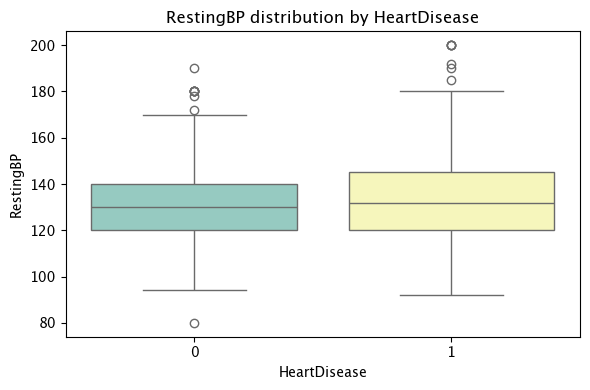

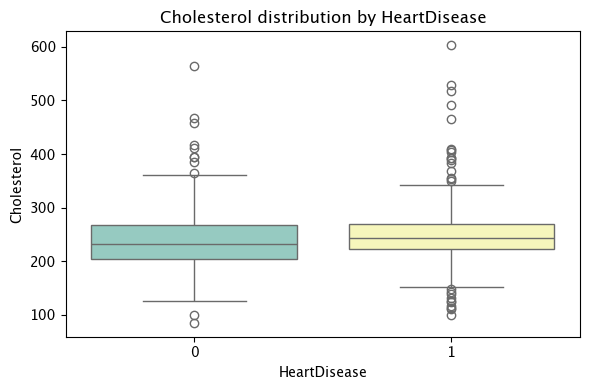

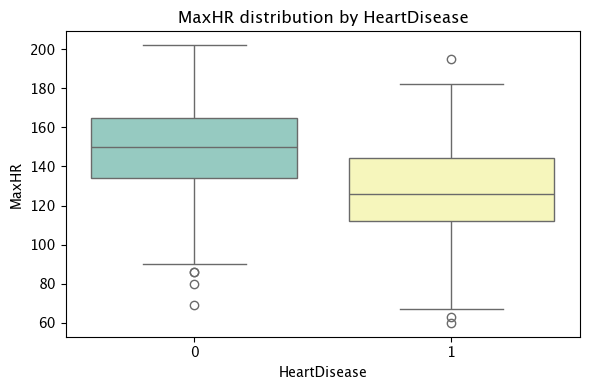

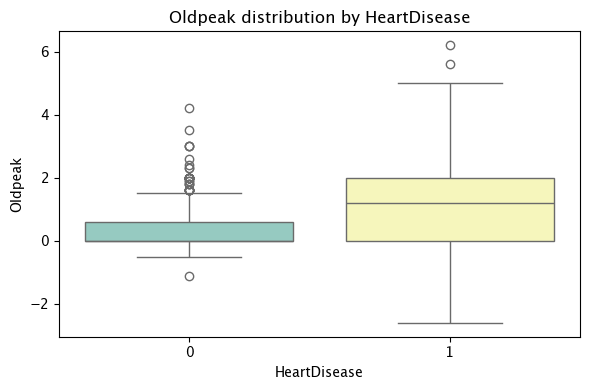

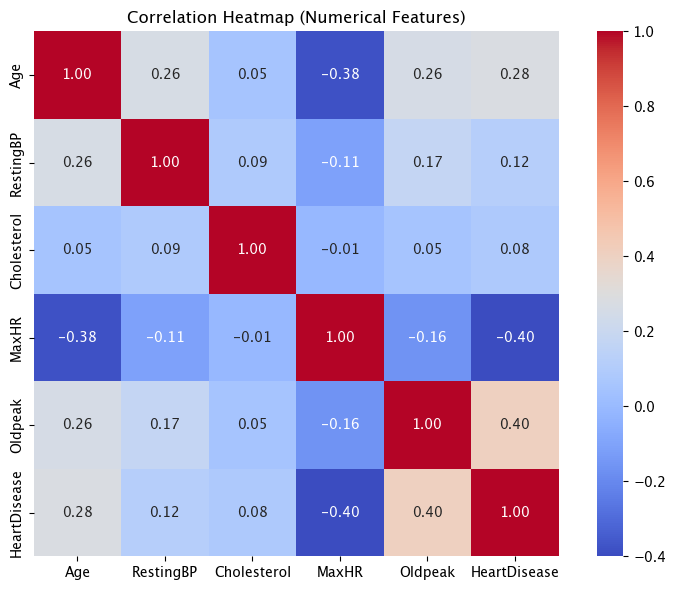

In [12]:
targetColumn = "HeartDisease"

# Categorical vs Target

for col in categoricalColumns:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        data=heartImputedDataset,
        x=col,
        hue=targetColumn,             
        palette="Set2",
        order=heartImputedDataset[col].value_counts().index
    )
    plt.title(f"{col} vs {targetColumn}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# Numerical vs Target

for col in numericColumns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=heartImputedDataset,
        x=targetColumn,
        y=col,
        hue=targetColumn,             
        palette="Set3",
        legend=False
    )
    plt.title(f"{col} distribution by {targetColumn}")
    plt.xlabel(targetColumn)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Correlation Heatmap

plt.figure(figsize=(8, 6))
corrMatrix = heartImputedDataset[numericColumns + [targetColumn]].corr(numeric_only=True)
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()